# San Diego Burrito Analytics: Lucha Libre Taco Shop

Scott Cole

31 August 2016

This analysis focuses on the 28 burritos reviewed at Lucha Libre

### imports

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_style("white")

### Load data

In [2]:
import util2
df, dfRestaurants, dfIngredients = util2.load_burritos()
N = df.shape[0]
dfLuchaLibre = df[df.Location=='lucha libre north park']

### Distribution of burritos

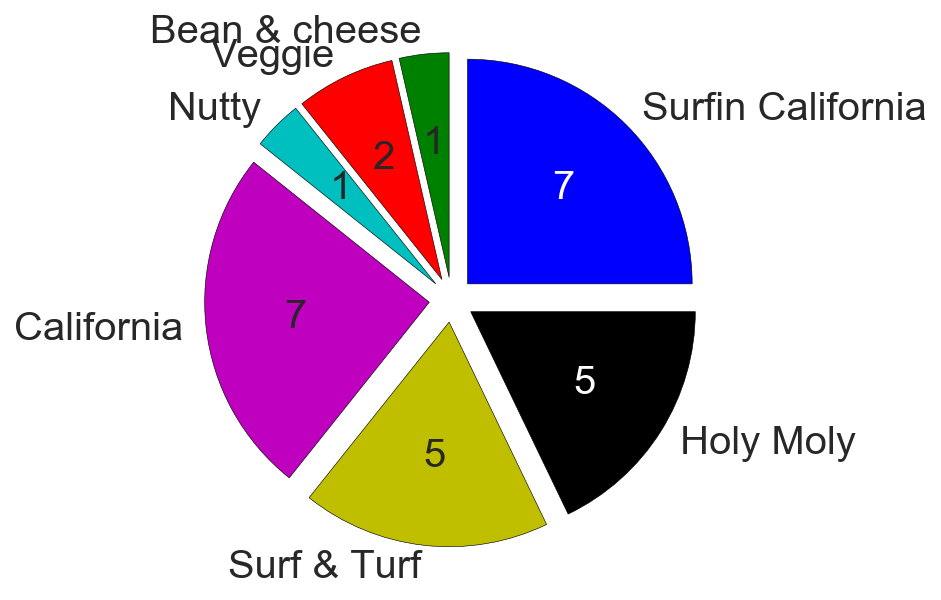

In [3]:
# Number of each type of burrito
ll_types = {'Veggie':'veg', 'Surf & Turf':'surf.*turf', 'Holy Moly':'moly', 'Bean & cheese':'bean.*cheese',
                            'California':'California - ', 'Surfin California':'surfin', 'Nutty':'nutty'}
def burritotypes(x, types):
    import re
    T = len(types)
    Nmatches = {}
    imatches = {}
    burrito_new = []
    for i, b in enumerate(x):
        matched = False
        for t in types.keys():
            re4str = re.compile('.*'+types[t]+'.*', re.IGNORECASE)
            if np.logical_and(re4str.match(b) is not None, matched is False):
                try:
                    Nmatches[t] +=1
                    imatches[t].append(x.index[i])
                    burrito_new.append(t)
                except KeyError:
                    Nmatches[t] = 1
                    imatches[t] = [x.index[i]]
                    burrito_new.append(t)
                matched = True
        if matched is False:
            try:
                Nmatches['other'] +=1
                burrito_new.append('other')
            except KeyError:
                Nmatches['other'] = 1
                burrito_new.append('other')
    return Nmatches, imatches, burrito_new

typecounts, imatches, burrito_new = burritotypes(dfLuchaLibre.Burrito,ll_types)

plt.figure(figsize=(6,6))
ax = plt.axes([0.1, 0.1, 0.65, 0.65])

# The slices will be ordered and plotted counter-clockwise.
labels = typecounts.keys()
fracs = typecounts.values()
explode=[.1]*len(typecounts)

patches, texts, autotexts = plt.pie(fracs, explode=explode, labels=labels,
                autopct=lambda(p): '{:.0f}'.format(p * np.sum(fracs) / 100), shadow=False, startangle=0)
                # The default startangle is 0, which would start
                # the Frogs slice on the x-axis.  With startangle=90,
                # everything is rotated counter-clockwise by 90 degrees,
                # so the plotting starts on the positive y-axis.


for t in texts:
    t.set_size(20)
for t in autotexts:
    t.set_size(20)
autotexts[0].set_color('w')
autotexts[6].set_color('w')
figname = 'luchalibre_types'
#plt.savefig('C:/gh/srcole.github.io/assets/burrito/'+figname + '.png')

C:\Users\Scott\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


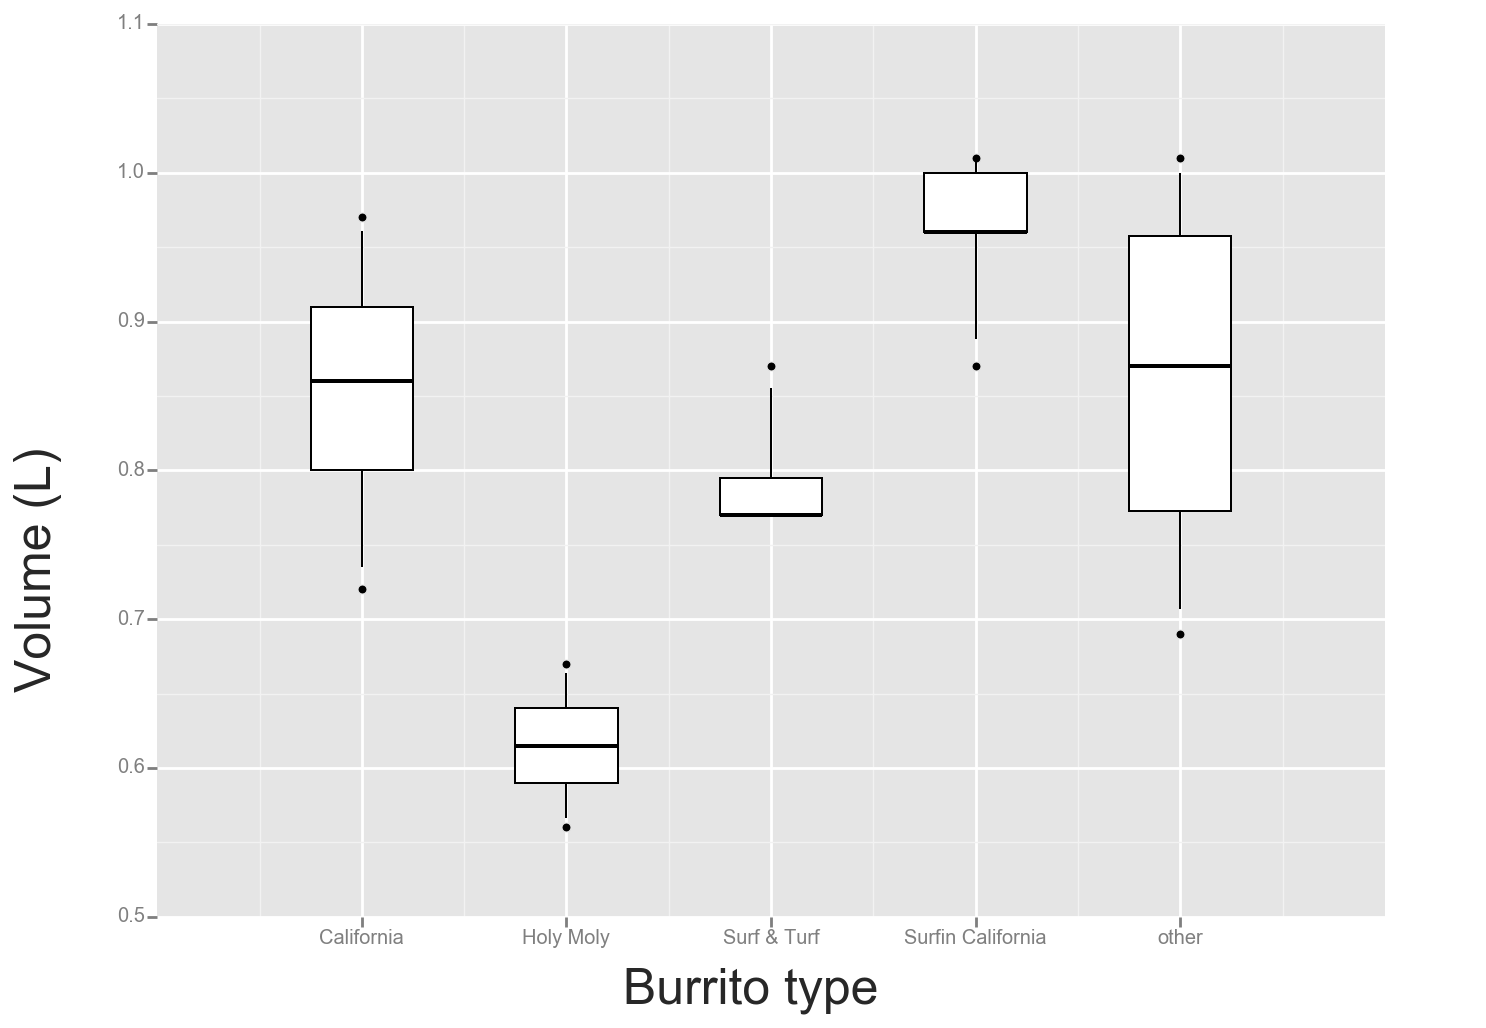

<ggplot: (28282849)>

In [4]:
# Look at volume across burritos, but export to csv to import to R for better plotting
ll_types = {'Surf & Turf':'surf.*turf', 'Holy Moly':'moly', 'California':'California - ', 'Surfin California':'surfin'}
typecounts, imatches, burrito_new = burritotypes(dfLuchaLibre.Burrito,ll_types)
# Create new column of simple burrito name
dfLuchaLibre['Burrito2'] = burrito_new

from ggplot import *
ggplot(aes(x='Burrito2',y='Volume'),data=dfLuchaLibre)+ geom_boxplot()+ylab(element_text(size=25,text='Volume (L)'))+\
    xlab(element_text(size=25,text='Burrito type'))
#dfLuchaLibre.to_csv('llburritoplt.csv')

# Average each metric over each Location

In [5]:
m_Location = ['Location','N','Hunger','Cost','Volume','Tortilla','Temp','Meat','Fillings','Meat:filling',
               'Uniformity','Salsa','Synergy','Wrap','overall']

# Calculate the mean of each of the metrics above for each taco shop
tacoshops = df.Location.unique()
TS = len(tacoshops)
dfmean = pd.DataFrame(np.nan, index=range(TS), columns=m_Location)
for ts in range(TS):
    dfmean.loc[ts] = df.loc[df.Location==tacoshops[ts]].mean()
    dfmean['N'][ts] = sum(df.Location == tacoshops[ts])
dfmean.Location = tacoshops

In [6]:
dfmean

,Location,N,Hunger,Cost,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall
0,donato's taco shop,1.0,3.000000,6.490000,NaN,3.000000,5.000000,3.000000,3.500000,4.000000,4.000000,4.000000,4.000000,4.000000,3.800000
1,oscar's mexican food,3.0,2.333333,5.183333,NaN,2.666667,2.500000,2.833333,2.833333,3.500000,4.333333,3.500000,3.166667,5.000000,3.250000
2,pollos maria,2.0,4.000000,6.790000,NaN,3.500000,4.500000,4.500000,3.500000,3.500000,3.750000,2.500000,4.250000,2.500000,3.700000
3,nico's taco shop,2.0,2.750000,7.090000,NaN,2.250000,3.000000,3.000000,2.250000,2.750000,3.000000,NaN,2.250000,3.000000,2.800000
4,los primos mexican food,11.0,3.318182,7.077273,0.761429,3.363636,3.500000,2.863636,3.090909,1.909091,2.750000,3.000000,2.545455,3.454545,2.645455
5,jv's mexican food,2.0,2.750000,7.875000,NaN,2.500000,2.000000,2.125000,2.750000,3.500000,2.500000,1.000000,2.500000,4.000000,2.250000
6,tony's fresh mexican food,4.0,2.875000,6.610000,NaN,3.250000,2.833333,2.750000,2.875000,3.500000,3.875000,1.666667,3.375000,3.500000,2.912500
7,taco stand,19.0,3.078947,7.574737,0.768889,3.657895,3.289474,4.236842,3.868421,3.868421,3.789474,3.631579,4.131579,4.052632,4.063158
8,graciela's taco shop,2.0,2.500000,5.990000,NaN,3.750000,4.000000,3.250000,3.500000,4.000000,4.500000,4.000000,4.000000,3.000000,4.000000
9,rigoberto's taco shop la jolla,2.0,3.250000,6.400000,NaN,3.250000,3.500000,2.875000,3.000000,4.000000,3.000000,1.750000,NaN,4.750000,3.250000


In [20]:
Ncutoff = 10
dfToRank = dfmean.loc[dfmean.N>=Ncutoff]

In [21]:
dfToRank

,Location,N,Hunger,Cost,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall
4,los primos mexican food,11.0,3.318182,7.077273,0.761429,3.363636,3.500000,2.863636,3.090909,1.909091,2.750000,3.000000,2.545455,3.454545,2.645455
7,taco stand,19.0,3.078947,7.574737,0.768889,3.657895,3.289474,4.236842,3.868421,3.868421,3.789474,3.631579,4.131579,4.052632,4.063158
10,lolita's taco shop,12.0,3.141667,7.225000,0.747778,2.983333,3.275000,3.363636,3.641667,3.354545,2.991667,2.854167,3.437500,3.916667,3.283333
13,rigoberto's taco shop,11.0,3.590909,6.827273,0.890000,3.545455,3.863636,3.681818,3.590909,4.000000,3.772727,3.593750,3.818182,3.772727,3.722727
23,california burritos,19.0,3.911053,6.250000,0.823571,3.963158,3.436842,4.000000,3.947368,3.986842,3.842105,3.611111,4.052632,4.342105,4.129412
46,lucha libre north park,28.0,3.489286,7.587500,0.827083,3.678571,3.200000,3.612000,3.364286,3.480000,3.185714,3.925926,3.314286,4.014286,3.264286


In [22]:
m_Rank = ['Location','Cost','Volume','Tortilla','Temp','Meat','Fillings','Meat:filling', 'Uniformity','Salsa','Synergy','Wrap','overall']
TS = len(dfToRank)
dfRanked = pd.DataFrame(np.nan, index=range(TS), columns=m_Rank)
dfRanked.Location[:] = dfToRank.Location
for m in m_Rank[1:]:
    if m == 'Cost':
        dfRanked[m][:] = dfToRank[m].rank(ascending=1)
    else:
        dfRanked[m][:] = dfToRank[m].rank(ascending=0)
        

C:\Users\Scott\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Scott\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [23]:
dfRanked

,Location,Cost,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall
0,los primos mexican food,3.0,5.0,5.0,2.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0
1,taco stand,5.0,4.0,3.0,4.0,1.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0
2,lolita's taco shop,4.0,6.0,6.0,5.0,5.0,3.0,5.0,5.0,6.0,4.0,4.0,4.0
3,rigoberto's taco shop,2.0,1.0,4.0,1.0,3.0,4.0,1.0,3.0,4.0,3.0,5.0,3.0
4,california burritos,1.0,3.0,1.0,3.0,2.0,1.0,2.0,1.0,3.0,2.0,1.0,1.0
5,lucha libre north park,6.0,2.0,2.0,6.0,4.0,5.0,4.0,4.0,1.0,5.0,3.0,5.0


In [37]:
dfRanked.loc[0].overall

6.0

In [44]:
rank_strs = {}
Nrank = len(dfRanked)
for k in dfRanked.keys()[1:]:
    rank_strs[k] = ['']*Nrank
    for i in range(Nrank):
        rest_rank = dfRanked.loc[i][k]-1
        rank_strs[k][int(rest_rank)] = dfRanked.loc[i].Location
        

In [55]:
dfRank2 = pd.DataFrame(index=np.arange(1,1+Nrank),columns=rank_strs.keys())
for k in dfRank2.keys():
    dfRank2[k] = rank_strs[k]

In [56]:
dfRank2

,Synergy,Fillings,Meat,Temp,overall,Meat:filling,Volume,Wrap,Cost,Uniformity,Salsa,Tortilla
1,taco stand,california burritos,taco stand,rigoberto's taco shop,california burritos,rigoberto's taco shop,rigoberto's taco shop,california burritos,california burritos,california burritos,lucha libre north park,california burritos
2,california burritos,taco stand,california burritos,los primos mexican food,taco stand,california burritos,lucha libre north park,taco stand,rigoberto's taco shop,taco stand,taco stand,lucha libre north park
3,rigoberto's taco shop,lolita's taco shop,rigoberto's taco shop,california burritos,rigoberto's taco shop,taco stand,california burritos,lucha libre north park,los primos mexican food,rigoberto's taco shop,california burritos,taco stand
4,lolita's taco shop,rigoberto's taco shop,lucha libre north park,taco stand,lolita's taco shop,lucha libre north park,taco stand,lolita's taco shop,lolita's taco shop,lucha libre north park,rigoberto's taco shop,rigoberto's taco shop
5,lucha libre north park,lucha libre north park,lolita's taco shop,lolita's taco shop,lucha libre north park,lolita's taco shop,los primos mexican food,rigoberto's taco shop,taco stand,lolita's taco shop,los primos mexican food,los primos mexican food
6,los primos mexican food,los primos mexican food,los primos mexican food,lucha libre north park,los primos mexican food,los primos mexican food,lolita's taco shop,los primos mexican food,lucha libre north park,los primos mexican food,lolita's taco shop,lolita's taco shop


In [60]:
dfRank2.reindex_axis(['Salsa','Volume','Meat','overall','Cost','Temp'], axis=1)

,Salsa,Volume,Meat,overall,Cost,Temp
1,lucha libre north park,rigoberto's taco shop,taco stand,california burritos,california burritos,rigoberto's taco shop
2,taco stand,lucha libre north park,california burritos,taco stand,rigoberto's taco shop,los primos mexican food
3,california burritos,california burritos,rigoberto's taco shop,rigoberto's taco shop,los primos mexican food,california burritos
4,rigoberto's taco shop,taco stand,lucha libre north park,lolita's taco shop,lolita's taco shop,taco stand
5,los primos mexican food,los primos mexican food,lolita's taco shop,lucha libre north park,taco stand,lolita's taco shop
6,lolita's taco shop,lolita's taco shop,los primos mexican food,los primos mexican food,lucha libre north park,lucha libre north park


# California vs. noncalifornia

In [26]:
# Number of each type of burrito
import re
re4str = re.compile('.*Cali.*', re.IGNORECASE)
N = len(dfLuchaLibre)
iscali = np.zeros(N,dtype=bool)
for i, b in enumerate(dfLuchaLibre.Burrito):
    if re4str.match(b):
        iscali[i] = True
    else:
        iscali[i] = False

In [29]:
dfLuchaLibre.iscali = iscali

In [34]:
sp.stats.ttest_ind(dfLuchaLibre[dfLuchaLibre.iscali==True].overall,dfLuchaLibre[dfLuchaLibre.iscali==False].overall)

Ttest_indResult(statistic=nan, pvalue=nan)